In [1]:
import matplotlib.pyplot as plt
import iso2mesh as i2m
import numpy as np

import pmmc
import pmcx

SHOW_SOURCE = True
pmmc.__version__, pmcx.__version__

c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packages\jdata\jfile.py:488: SyntaxWarning: invalid escape sequence '\/'
  newdomain = re.sub("^(https*|ftp)://([^\/?#:]+).*$", r"\2", link)
c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packages\jdata\jfile.py:504: SyntaxWarning: invalid escape sequence '\d'
  "^(https*|ftp)://neurojson.io(:\d+)*(?P<dbname>/[^\/]+)(?P<docname>/[^\/]+)(?P<filename>/[^\/?]+)*",
c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packages\jdata\jfile.py:522: SyntaxWarning: invalid escape sequence '\.'
  suffix = re.search("((\.\w{1,5})+)(?=([#&].*)*$)", link)
c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packages\jdata\jdata.py:386: SyntaxWarning: invalid escape sequence '\:'
  if re.search("\:\$", datalink):
c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packages\jdata\jdata.py:388: SyntaxWarning: invalid escape sequence '\:'
  "^(?P<proto>[a-zA-Z]+://)*(?P<path>.+)(?P<delim>\:)()*(?P<jsonpath>(?<=:)\$\d*\.*.*)*",
c:\Projects\mwe-mmc-isspecular\.venv\Lib\site-packa

the pmmc binary extension (_pmmc) is not compiled! please compile first


('0.3.6', '0.6.1')

# MCX

In [ ]:
mcx_config = {}

mcx_config["srctype"] = "pencil"
mcx_config["srcpos"] = np.array([15, 13, 0.5])
mcx_config["srcpos"] -= 1/2

mcx_config["srcdir"] = np.array([0., 1., 1.])
mcx_config["srcdir"] /= np.linalg.norm(mcx_config["srcdir"])

mcx_config["issrcfrom0"] = True
mcx_config["unitinmm"] = 1

mcx_config["isreflect"] = True
mcx_config["isspecular"] = True
mcx_config["bc"] = "rrrrrr000000"

mcx_config["nphoton"] = 10**6

prop = [[0, 0, 1.0, 1.0], [1e-3, 1e-1, 0.5, 1.35]]
mcx_config["prop"] = prop

mcx_config["tstart"] = 0
mcx_config["tend"] = 2e-9
mcx_config["tstep"] = 5e-10

mcx_config["tstep"] = 5e-10

volume = np.zeros((30, 30, 36))
volume[..., 3:-3] = 1

mcx_config["vol"] = volume
mcx_config["outputtype"] = "flux"

nphoton: 1e+06
tstart: 0
tstep: 5e-10
tend: 2e-09
isreflect: 1
issrcfrom0: 1
unitinmm: 1
isspecular: 0
nphoton: 1e+06
tstart: 0
tstep: 5e-10
tend: 2e-09
isreflect: 1
issrcfrom0: 1
unitinmm: 1
isspecular: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

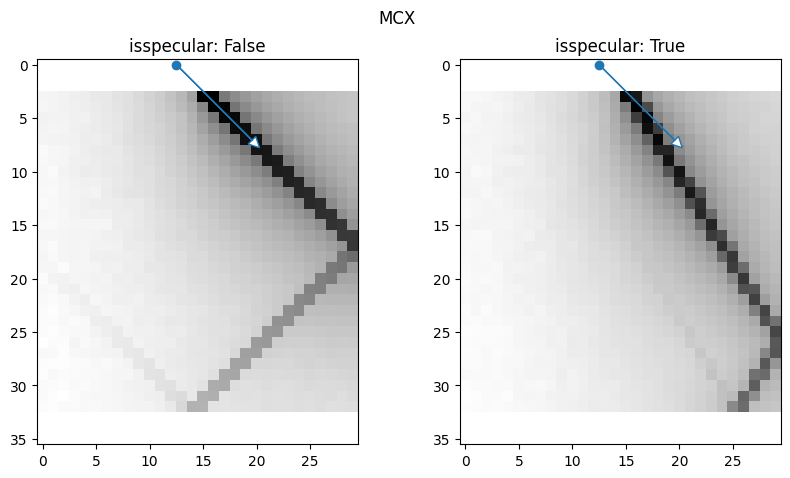

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for isspecular, ax in enumerate((axs)):
    mcx_config["isspecular"] = isspecular

    result = pmcx.run(mcx_config)

    ax.imshow(result["flux"][14, ..., 0].T, cmap="binary", origin="upper", norm="log")
    ax.set_title(f"isspecular: {bool(isspecular)}")

    if SHOW_SOURCE:
        ax.scatter(*mcx_config["srcpos"][1:])
        ax.arrow(
            *mcx_config["srcpos"][1:],
            *mcx_config["srcdir"][1:] * 10,
            head_width=1,
            head_length=1,
            fc="white",
            ec="tab:blue",
        )

    fig.suptitle("MCX")

# MMC
Generate a square with 30 mm edges, sandwiched between two air layers.

Creating volumetric mesh from surface mesh...
Volume mesh generation complete


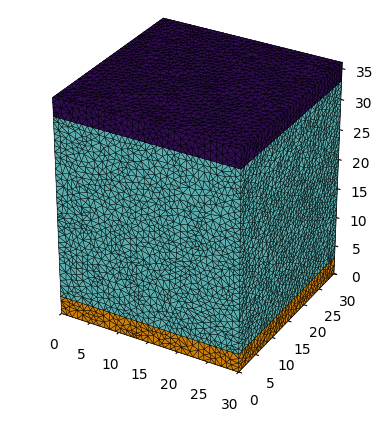

{'fig': [<Figure size 640x480 with 1 Axes>],
 'ax': [<Axes3D: >],
 'obj': [<mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2517ecdf620>]}

In [2]:
no, fc, c0 = i2m.latticegrid([0,30], [0, 30], [0, 3, 33, 36])
no2, el2, fc2 = i2m.s2m(no, fc, 1, maxvol=0.3, regions=c0)

el3, _, _ = i2m.meshreorient(no2, el2[:, :4])
assert np.allclose(el3, el2[:, :4])

i2m.plotmesh(no2, el2)

Update the element label such that the cube is 1 and the air layers 0.

In [4]:
np.unique(el2[:, 4], return_counts=True)

(array([1, 2, 3]), array([ 17725, 171486,  17636]))

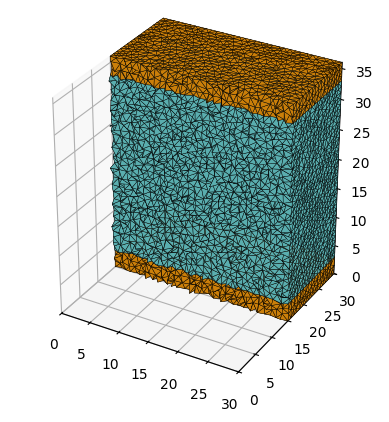

{'fig': [<Figure size 640x480 with 1 Axes>],
 'ax': [<Axes3D: >],
 'obj': [<mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2513e77a490>]}

In [5]:
el2[:, 4] = np.where(el2[:, 4] == 2, 1, 0)
i2m.plotmesh(no2, el2, "y >15")

In [72]:
mmc_config = {}

mmc_config["srctype"] = "pencil"
mmc_config["srcpos"] = [15, 13, 0.5]
mmc_config["srcdir"] = np.array([0., 1., 1.])
mmc_config["srcdir"] /= np.linalg.norm(mmc_config["srcdir"])

mmc_config["issrcfrom0"] = False
mmc_config["unitinmm"] = 1

mmc_config["isreflect"] = True
mmc_config["isspecular"] = True
mmc_config["bc"] = "rrrrrr000000"

mmc_config["nphoton"] = 10**6
mmc_config["method"] = "grid"
mmc_config["steps"] = [1, 1, 1]

prop = [[0, 0, 1.0, 1.0], [1e-3, 1e-1, 0.5, 1.35]]
mmc_config["prop"] = prop
mmc_config["nout"] = 1.0

mmc_config["tstart"] = 0
mmc_config["tend"] = 2e-9
mmc_config["tstep"] = 5e-10

mmc_config["node"] = no2
mmc_config["elem"] = el2[:, :4]
mmc_config["elemprop"] = el2[:, 4]

mmc_config["outputtype"] = "flux"
mmc_config["isnormalized"] = False

nphoton: nphoton: 

###############################################################################
#                     Mesh-based Monte Carlo (MMC) - OpenCL                   #
#          Copyright (c) 2010-2025 Qianqian Fang <q.fang at neu.edu>          #
#              https://mcx.space/#mmc  &  https://neurojson.io                #
#                                                                             #
#Computational Optics & Translational Imaging (COTI) Lab  [http://fanglab.org]#
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

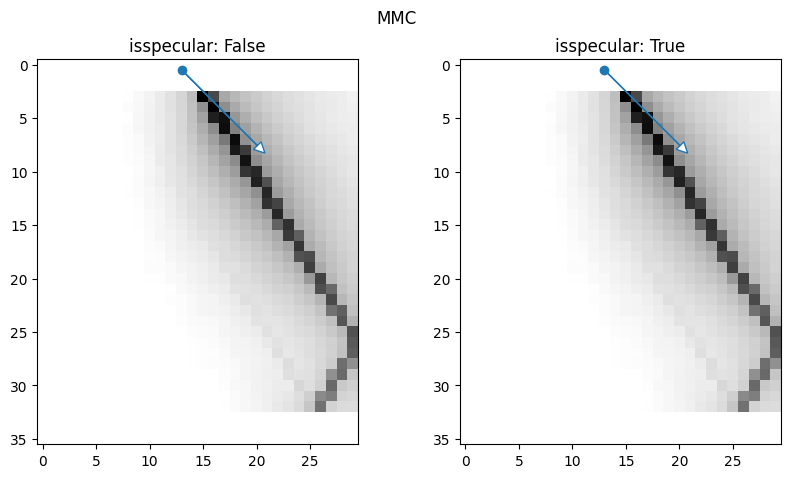

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for isspecular, ax in enumerate((axs)):
    mmc_config["isspecular"] = isspecular

    result = pmmc.run(mmc_config)

    layer = result["flux"][15, ..., 0].T

    ax.imshow(layer, cmap="binary", origin="upper", norm="log", vmin=np.percentile(layer, 50))
    ax.set_title(f"isspecular: {bool(isspecular)}")

    ax.set_xlim(-1/2, 29.5)
    ax.set_ylim(35.5, -1/2)

    
    if SHOW_SOURCE:
        ax.scatter(*mmc_config["srcpos"][1:])
        ax.arrow(
            *mmc_config["srcpos"][1:],
            *mmc_config["srcdir"][1:] * 10,
            head_width=1,
            head_length=1,
            fc="white",
            ec="tab:blue",
    )
    
    fig.suptitle("MMC")